### 2 vLLM versions were tested on MI350x8
- vllm-dev-dsfp4_1120
- vllm-latest-0.15.1

### Each vLLM version was tested with 60 samples, using num_prompts values from 1 to 60.
### Both input and output lengths are 1024 for all test cases.

In [1]:
import json
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy
%matplotlib inline  

In [36]:
df = pd.read_csv("./deepseek_r1_mxfp4_vllm_20260216.csv")

In [58]:
#df.info()
#df.head()

In [75]:
df['others'].unique()

array(['doks-1.34.1-rocm-7.0.2-mi350x8-vllm-dev-dsfp4_1120',
       'doks-1.34.1-rocm-7.0.2-mi350x8-vllm-latest-0.15.1'], dtype=object)

In [68]:
# All requests are successfully processed
df [ df['failed'] >0 ] 

,others,total_input_tokens,total_token_throughput,backend,base_url,endpoint_type,max_concurrent_requests,std_itl_ms,timestamp,tokenizer_id,...,max_concurrency,duration,request_goodput,label,mean_tpot_ms,p99_ttft_ms,output_throughput,max_output_tokens_per_s,median_ttft_ms,model_id


In [69]:
# Split samples
df_dev    = df[ df["others"] == "doks-1.34.1-rocm-7.0.2-mi350x8-vllm-dev-dsfp4_1120" ].copy()
df_latest = df[ df["others"] == "doks-1.34.1-rocm-7.0.2-mi350x8-vllm-latest-0.15.1" ].copy()

df_dev = df_dev.sort_values("num_prompts")
df_latest = df_latest.sort_values("num_prompts")

print(df_dev.shape)
print(df_latest.shape)

(60, 37)
(60, 37)


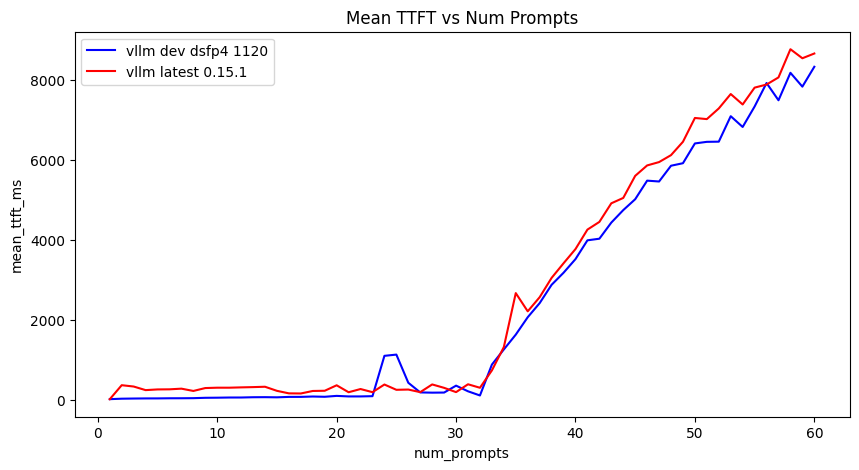

In [70]:
plt.figure(figsize=(10, 5)) 

plt.plot(
    df_dev["num_prompts"],
    df_dev["mean_ttft_ms"],
    color="blue",
    label="vllm dev dsfp4 1120"
)

plt.plot(
    df_latest["num_prompts"],
    df_latest["mean_ttft_ms"],
    color="red",
    label="vllm latest 0.15.1"
)

plt.xlabel("num_prompts")
plt.ylabel("mean_ttft_ms")
plt.title("Mean TTFT vs Num Prompts")
plt.legend()

plt.show()

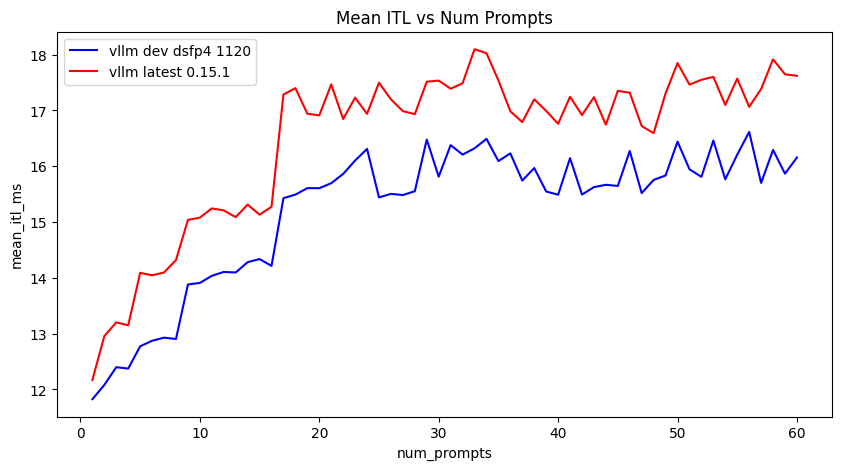

In [71]:
plt.figure(figsize=(10, 5)) 

plt.plot(
    df_dev["num_prompts"],
    df_dev["mean_itl_ms"],
    color="blue",
    label="vllm dev dsfp4 1120"
)

plt.plot(
    df_latest["num_prompts"],
    df_latest["mean_itl_ms"],
    color="red",
    label="vllm latest 0.15.1"
)

plt.xlabel("num_prompts")
plt.ylabel("mean_itl_ms")
plt.title("Mean ITL vs Num Prompts")
plt.legend()

plt.show()

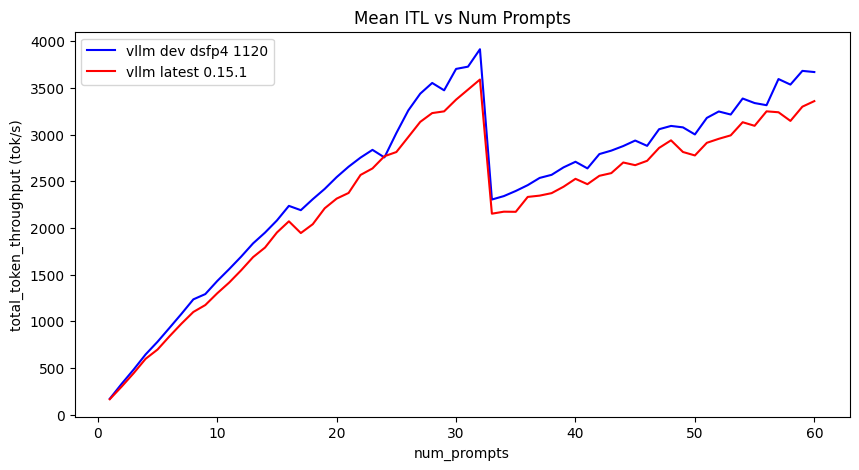

In [72]:
plt.figure(figsize=(10, 5)) 

plt.plot(
    df_dev["num_prompts"],
    df_dev["total_token_throughput"],
    color="blue",
    label="vllm dev dsfp4 1120"
)

plt.plot(
    df_latest["num_prompts"],
    df_latest["total_token_throughput"],
    color="red",
    label="vllm latest 0.15.1"
)

plt.xlabel("num_prompts")
plt.ylabel("total_token_throughput (tok/s)")
plt.title("Mean ITL vs Num Prompts")
plt.legend()

plt.show()

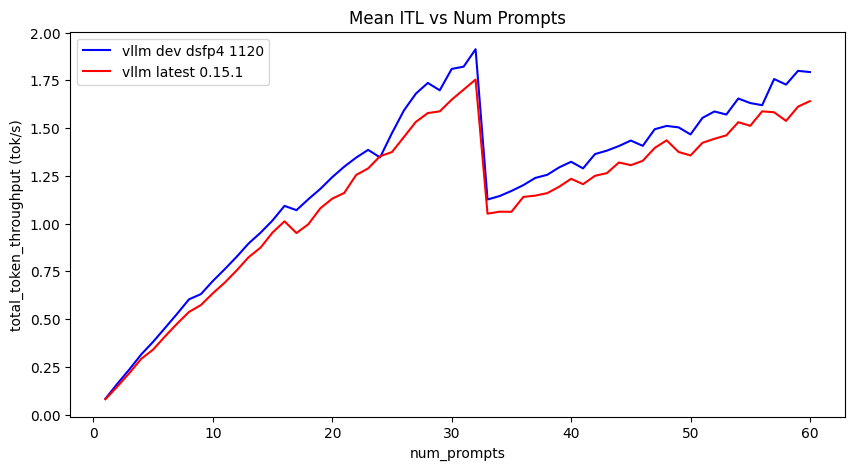

In [74]:
plt.figure(figsize=(10, 5)) 

plt.plot(
    df_dev["num_prompts"],
    df_dev["request_throughput"],
    color="blue",
    label="vllm dev dsfp4 1120"
)

plt.plot(
    df_latest["num_prompts"],
    df_latest["request_throughput"],
    color="red",
    label="vllm latest 0.15.1"
)

plt.xlabel("num_prompts")
plt.ylabel("total_token_throughput (tok/s)")
plt.title("Mean ITL vs Num Prompts")
plt.legend()

plt.show()